In [515]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [516]:
df = pd.read_csv('Housing.csv')

# EDA

In [520]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [521]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [522]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


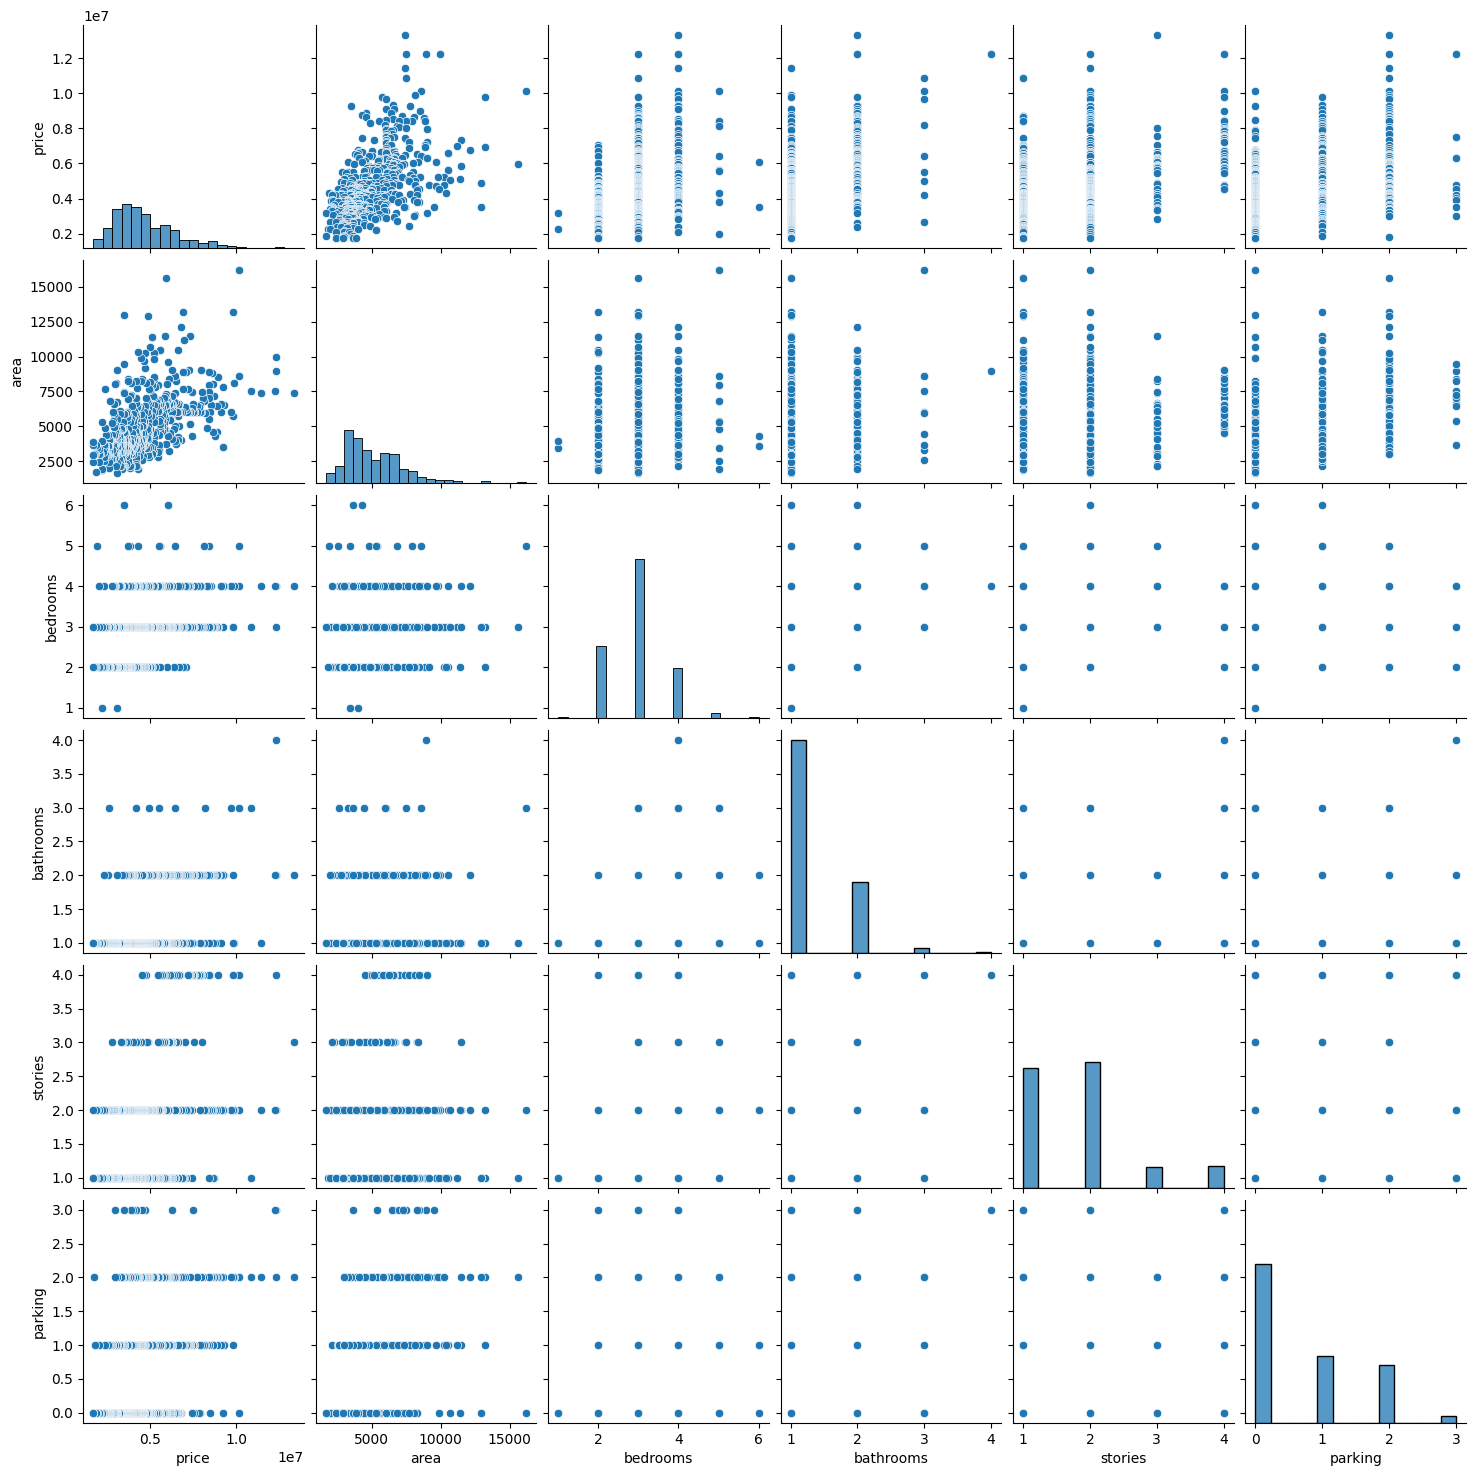

In [523]:
sns.pairplot(df)

<Axes: xlabel='area', ylabel='price'>

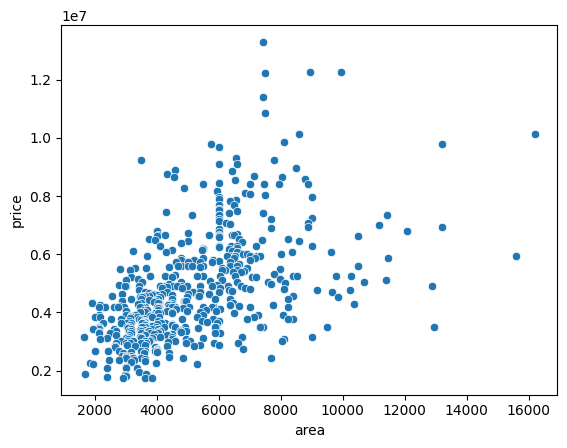

In [524]:
sns.scatterplot(x = df['area'], y = df['price']) #1,00,00,000

<Axes: xlabel='area'>

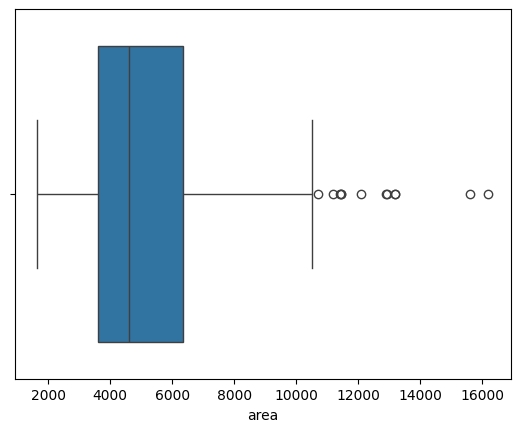

In [525]:
sns.boxplot(x = df['area']) # there are outliers in the datapoints

<Axes: xlabel='price'>

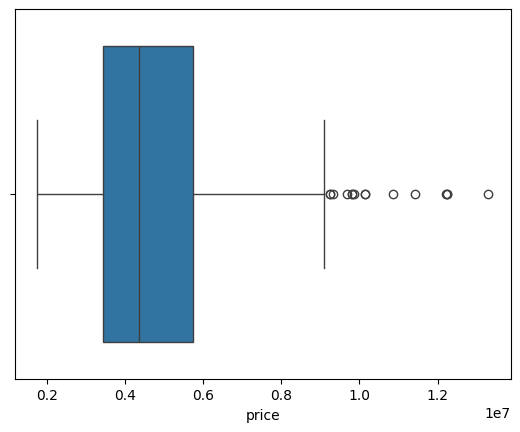

In [526]:
sns.boxplot(x = df['price'])

In [527]:
df['area'].corr(df['price'])

np.float64(0.5359973457780802)

In [528]:
df_num = df.select_dtypes(include=['number'])
df_num.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


<Axes: >

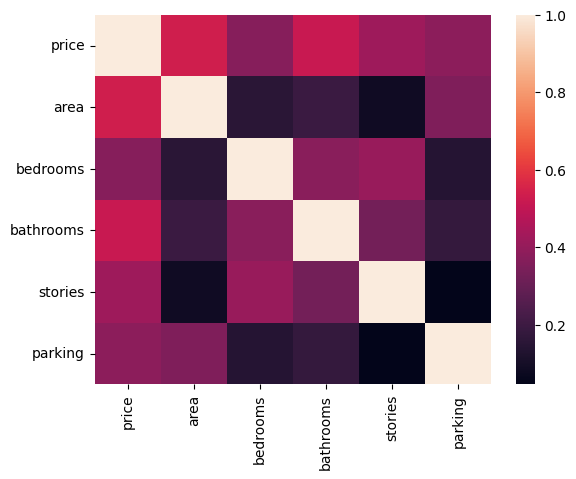

In [529]:
sns.heatmap(df_num.corr())

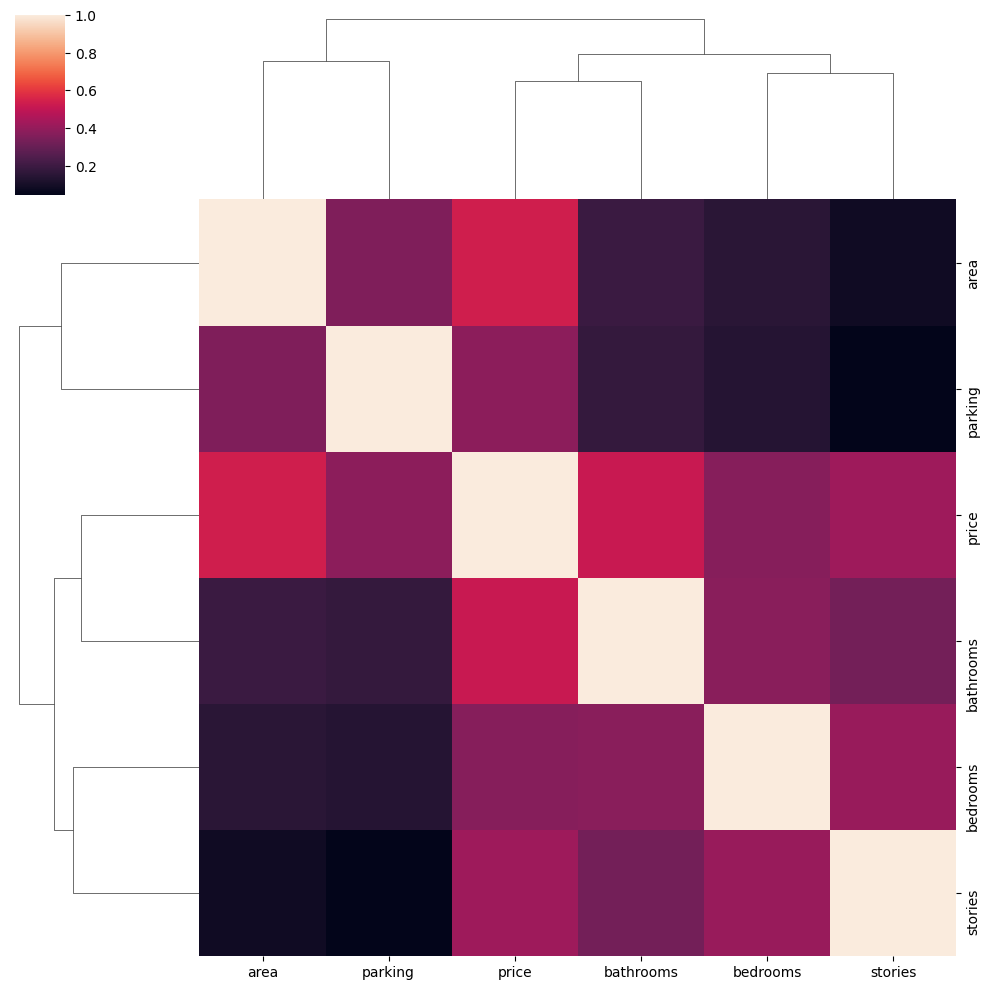

In [530]:
sns.clustermap(df_num.corr())

In [533]:

class GDRegressor:
    def __init__(self, learning_rate=1e-6, epochs=10000): 
        self.m = 0
        self.b = 0
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        X = X.ravel()
        self.X = X
        self.y = y
        for i in range(self.epochs):    
            y_pred = self.m * X + self.b
            error = y - y_pred

            loss_slope_b = -2 * np.sum(error)
            loss_slope_m = -2 * np.sum(error * X)

            self.b -= self.lr * loss_slope_b
            self.m -= self.lr * loss_slope_m

            if np.isnan(self.m) or np.isnan(self.b):
                print("Stopped due to NaN")
                break

            if i % 1000 == 0:
                loss = self.mean_squared_error(y, y_pred)
                print(f"Epoch {i}: Loss={loss:.4f}, m={self.m:.4f}, b={self.b:.4f}")

    def predict(self, X):
        return self.m * X.ravel() + self.b

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def r2_score(self, y_true, y_pred):
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        return 1 - (ss_res / ss_tot)


In [543]:
X = df['area'].values.reshape(-1, 1)
y = df['price'].values

# Normalize X
X_mean = X.mean()
X_std = X.std()
X_scaled = (X - X_mean) / X_std

In [544]:
gd = GDRegressor(learning_rate=1e-6, epochs=10000)
gd.fit(X_scaled, y)

y_pred = gd.predict(X_scaled)

print("MSE:", gd.mean_squared_error(y, y_pred))
print("R2 Score:", gd.r2_score(y, y_pred))
print("m, b:", gd.m, gd.b)

Epoch 0: Loss=26213832729318.5312, m=1091.7772, b=5195.7349
Epoch 1000: Loss=5167581675601.4180, m=665432.7857, b=3166774.5724
Epoch 2000: Loss=2791308226230.0376, m=888662.4447, b=4229117.7921
Epoch 3000: Loss=2523009825162.0713, m=963671.3333, b=4586082.8321
Epoch 4000: Loss=2492717001735.2578, m=988875.5709, b=4706029.0392
Epoch 5000: Loss=2489296723613.8999, m=997344.6151, b=4746332.9652
Epoch 6000: Loss=2488910549559.9795, m=1000190.3552, b=4759875.7566
Epoch 7000: Loss=2488866947725.6753, m=1001146.5713, b=4764426.3604
Epoch 8000: Loss=2488862024764.2915, m=1001467.8759, b=4765955.4392
Epoch 9000: Loss=2488861468926.4658, m=1001575.8396, b=4766469.2351
MSE: 2488861406168.3687
R2 Score: 0.28729315239379705
m, b: 1001612.0971272822 4766641.78380833


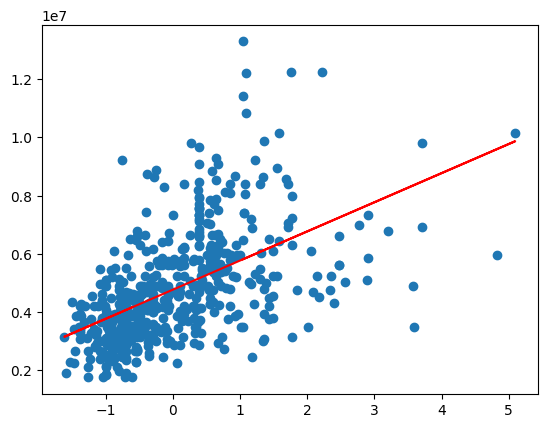

In [545]:
plt.scatter(X_scaled, y)
plt.plot(X_scaled, y_pred, 'r-')
plt.show()

# dataset 2

In [546]:
df = pd.read_csv('advertising.csv')

In [547]:
print(df.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [548]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [549]:
df.head(120)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
115,75.1,35.0,52.7,12.6
116,139.2,14.3,25.6,12.2
117,76.4,0.8,14.8,9.4
118,125.7,36.9,79.2,15.9


In [550]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

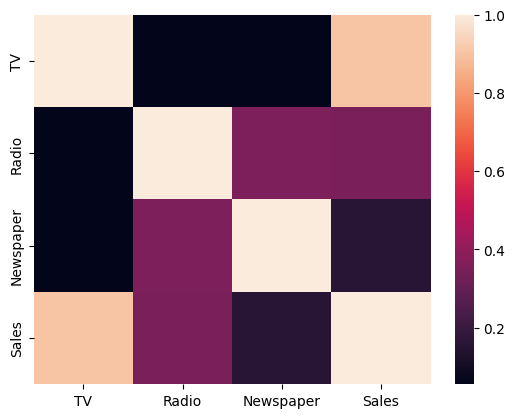

In [551]:
sns.heatmap(df.corr())

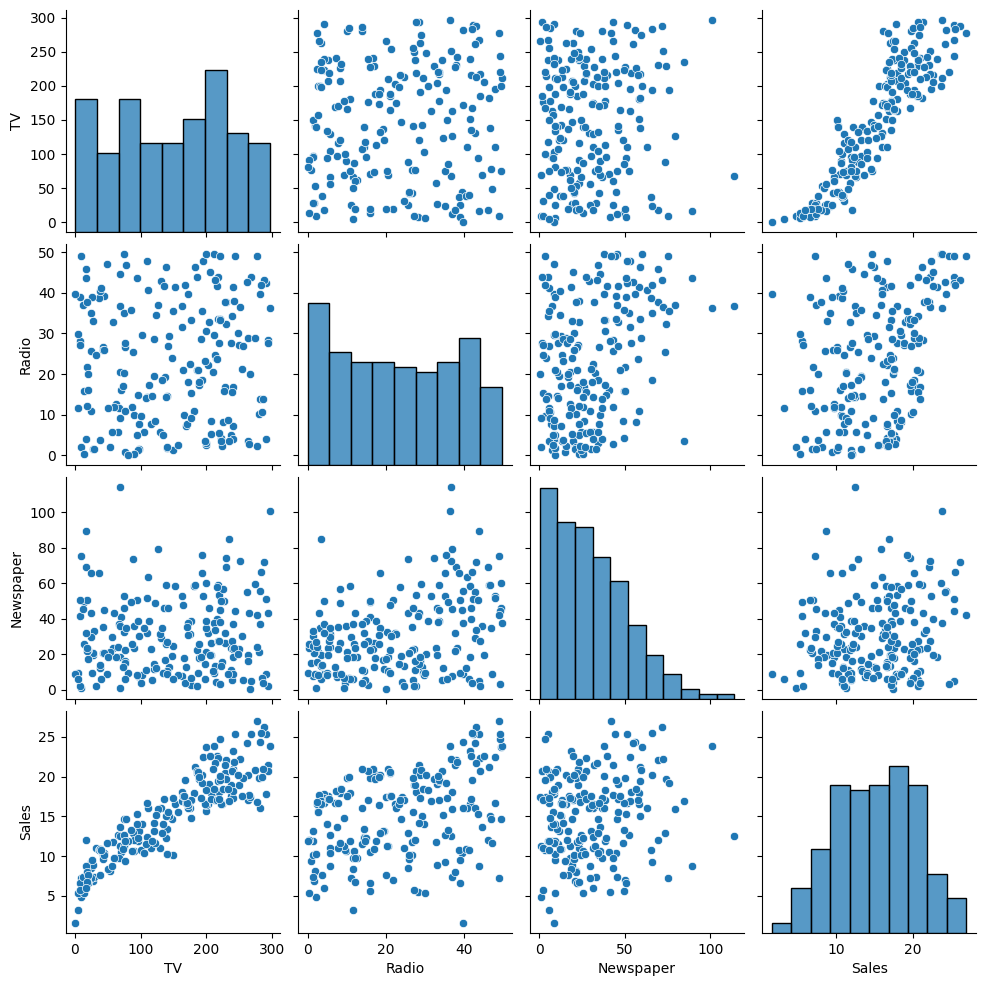

In [552]:
sns.pairplot(df)

In [553]:
X = df['TV'].values.reshape(-1, 1)
y = df['Sales'].values

# Normalize X
X_mean = X.mean()
X_std = X.std()
X_scaled = (X - X_mean) / X_std

In [554]:
gd = GDRegressor(learning_rate=1e-6, epochs=10000)
gd.fit(X_scaled, y)

y_pred = gd.predict(X_scaled)

print("MSE:", gd.mean_squared_error(y, y_pred))
print("R2 Score:", gd.r2_score(y, y_pred))
print("m, b:", gd.m, gd.b)


Epoch 0: Loss=256.7120, m=0.0019, b=0.0061
Epoch 1000: Loss=118.2033, m=1.5675, b=4.9931
Epoch 2000: Loss=55.9773, m=2.6169, b=8.3357
Epoch 3000: Loss=28.0218, m=3.3202, b=10.5762
Epoch 4000: Loss=15.4626, m=3.7917, b=12.0779
Epoch 5000: Loss=9.8203, m=4.1076, b=13.0844
Epoch 6000: Loss=7.2855, m=4.3194, b=13.7591
Epoch 7000: Loss=6.1467, m=4.4614, b=14.2113
Epoch 8000: Loss=5.6351, m=4.5565, b=14.5144
Epoch 9000: Loss=5.4052, m=4.6203, b=14.7175
MSE: 5.301975890007066
R2 Score: 0.8091435850887558
m, b: 4.6630368089284016 14.853596896047495


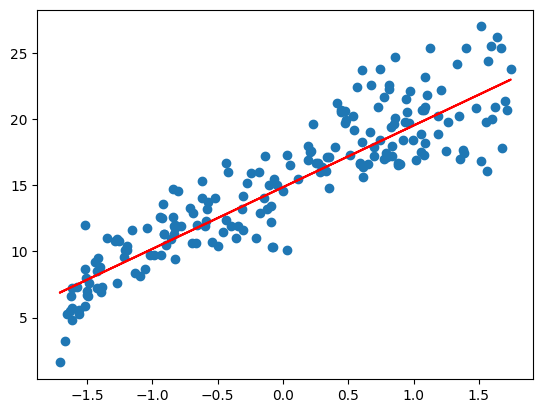

In [555]:
plt.scatter(X_scaled, y)
plt.plot(X_scaled, y_pred, 'r-')
plt.show()